<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

sns.set_style("whitegrid")

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [2]:
# import data and display first 5 rows
sd = pd.read_csv('./datasets/speed_dating.csv')
sd.head()

,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,10.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN


In [3]:
# check datatypes
sd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_id                 551 non-null    int64  
 1   wave                       551 non-null    int64  
 2   like_sports                544 non-null    float64
 3   like_tvsports              544 non-null    float64
 4   like_exercise              544 non-null    float64
 5   like_food                  544 non-null    float64
 6   like_museums               544 non-null    float64
 7   like_art                   544 non-null    float64
 8   like_hiking                544 non-null    float64
 9   like_gaming                544 non-null    float64
 10  like_clubbing              544 non-null    float64
 11  like_reading               544 non-null    float64
 12  like_tv                    544 non-null    float64
 13  like_theater               544 non-null    float64

In [4]:
# check na
sd.isna().sum()

subject_id                     0
wave                           0
like_sports                    7
like_tvsports                  7
like_exercise                  7
like_food                      7
like_museums                   7
like_art                       7
like_hiking                    7
like_gaming                    7
like_clubbing                  7
like_reading                   7
like_tv                        7
like_theater                   7
like_movies                    7
like_concerts                  7
like_music                     7
like_shopping                  7
like_yoga                      7
subjective_attractiveness      9
subjective_sincerity           9
subjective_intelligence        9
subjective_fun                 9
subjective_ambition            9
objective_attractiveness     237
objective_sincerity          237
objective_intelligence       237
objective_fun                237
objective_ambition           237
dtype: int64

In [5]:
# drop columns that have na more than 200
sd.drop(columns=['objective_attractiveness', 'objective_sincerity', 'objective_intelligence',\
                 'objective_fun', 'objective_ambition'], inplace=True)

In [6]:
# drop rows that contain missing values
sd.dropna(inplace=True)

In [7]:
# compare shape before and after remove missing values
sd.shape

(542, 24)

**Before** remove missing values dataframe had 551 rows and 29 columns <br>
**After** remove missing values dataframe has 542 rows and 24 columns

---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column (i.e. standardize the `subjective` columns).
- Visualize correlation using [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).
- Visualize correlation using a heat map.

**3.A) Find the z scores of each column. This allows the columns to more easily be directly compared.**

In [8]:
sd['like_yoga'].std()

2.755786374272856

In [9]:
# extract columns that start with 'subjective'
subjective_cols = [col for col in sd.columns \
                   if col.startswith('subjective')]
subjective = sd[subjective_cols].copy()

In [10]:
# calculate Z_score for each columns and store in list
subjective = (subjective - subjective.mean())/ subjective.std()

**3.B) Use a PairGrid to visualize correlation.**

[`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) is more general version of `pairplot`.  For example, you could use the following code, where `subjective` is a data frame containing only the subjective columns:

```python
g = sns.PairGrid(subjective)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()
```

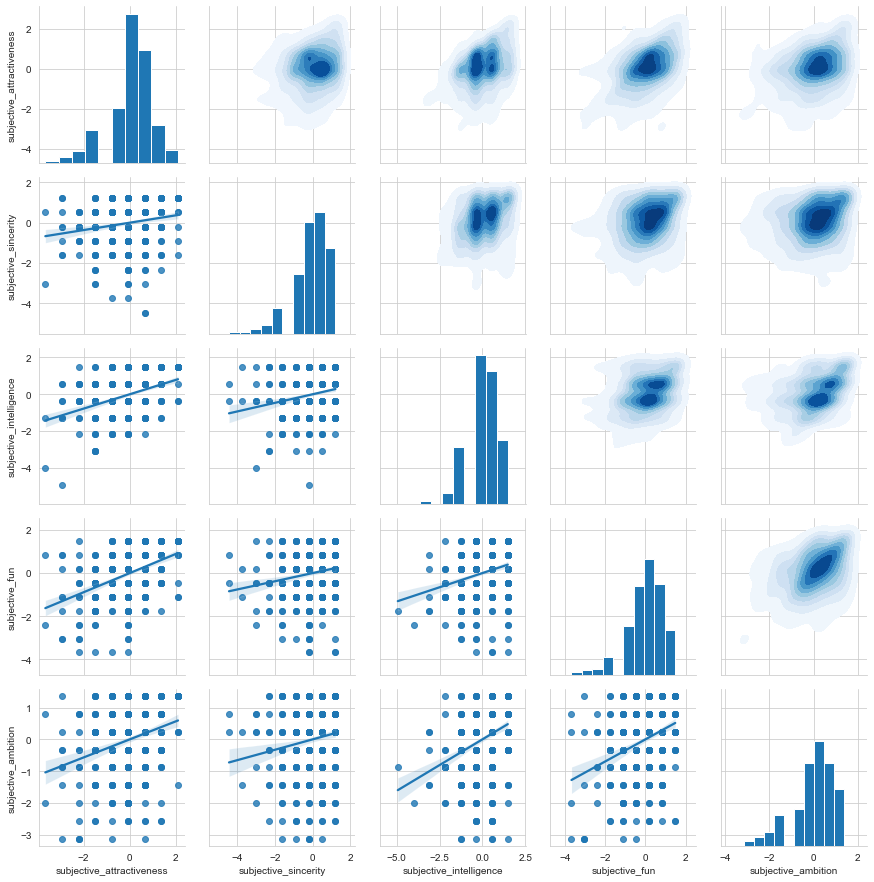

In [11]:
g = sns.PairGrid(subjective)

# Regression plots in lower traiangle
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', shade=True, thresh=0.05) # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

For each features there is no linear relationship which the assumption from pca need features have linear relationship.

**3.C) Use a heat map to visualize correlation.**

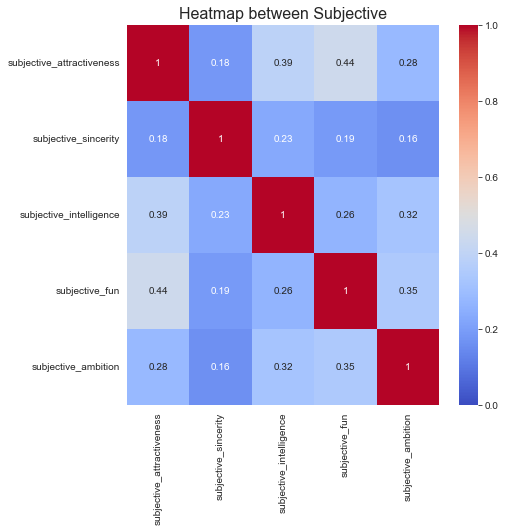

In [12]:
# plot correlation heatmap
plt.figure(figsize=(7, 7))
plt.title('Heatmap between Subjective', size=16)
sns.heatmap(subjective.corr(), annot=True, cmap='coolwarm', vmin=0, vmax=1);

From all of the variables there are no strong correlation.<br>

For intesting correlation
- subjective **attractiveness** are **moderate** correlation with **intelligent and fun** which that interesting for create assumption that if you smart and funny this personality will more attractive to other people.
- subjective **intelligent** and **ambition** are **moderate** correlation which from my assumption that smart people also set a **high goal for fulfill** their need that why there are intelligent.
- subjective **ambition** and **fun** are **moderate** correlation which quite odd because from my assumption if you are ambition you will try everthing for achieve your goal which sacrified your happiness.

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — sometimes your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [13]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 
                   'like_theater', 'like_shopping']
sd_like = sd[preference_cols]

**4.A) Find the z scores of each column in `preference_cols`.**

In [14]:
# calculate Z_score for each columns and store in list
sd_like = (sd_like - sd_like.mean())/ sd_like.std()

**4.B) Visualize correlation using PairGrid.**

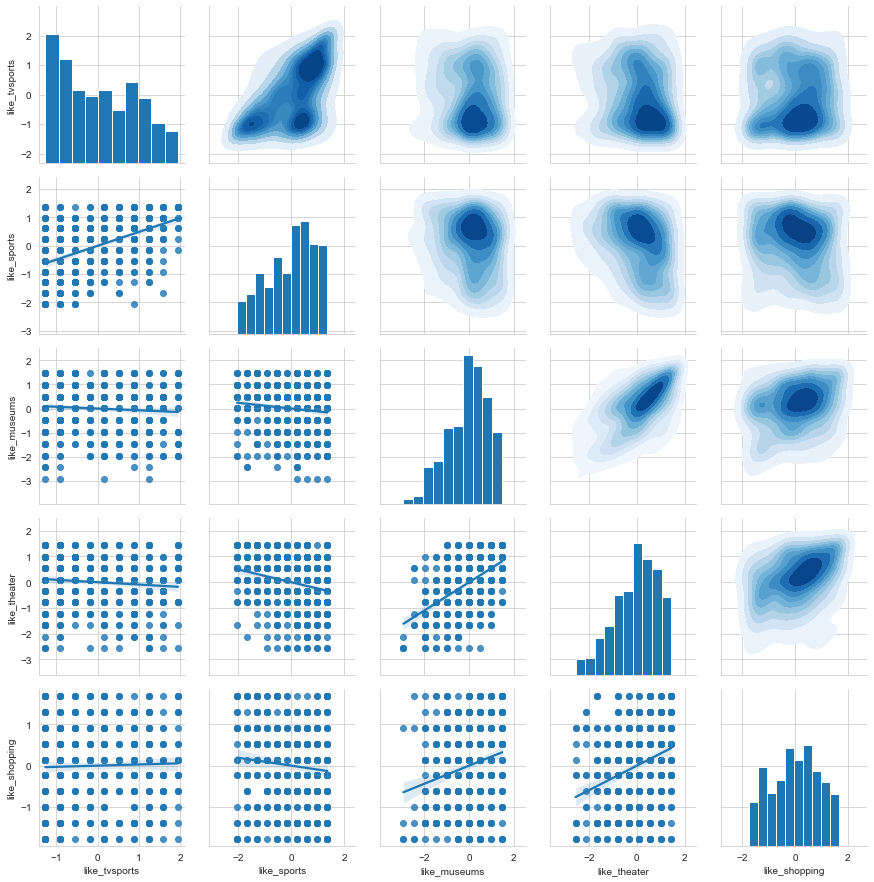

In [15]:
g = sns.PairGrid(sd_like)

# Regression plots in lower traiangle
g = g.map_lower(sns.regplot)
g = g.map_upper(sns.kdeplot, cmap='Blues', shade=True, thresh=0.05) # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

For each features there is no linear relationship which the assumption from pca need features have linear relationship.

**4.C) Visualize correlation using a heat map.**

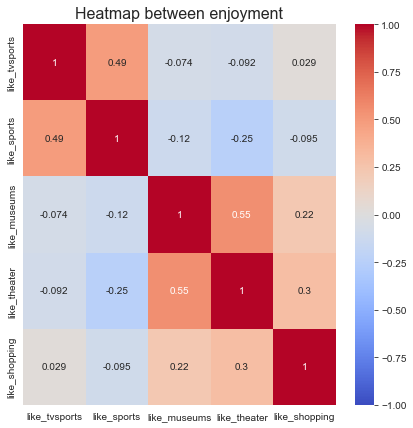

In [16]:
# plot correlation heatmap
plt.figure(figsize=(7, 7))
plt.title('Heatmap between enjoyment', size=16)
sns.heatmap(sd_like.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1);

From all of the variables there are no strong correlation.<br>

For intesting correlation
- Enjoy **sports** and **tvsports** are **moderate** correlation which from my assumption that people who love sport also watching sports news or sports competitor as well.
- Enjoy **shopping** and **theater** are **moderate** correlation which from my assumption that people who love shopping usually shop in the mall and mall also have theater that they will spendtime watching movie too.
- Enjoy **theater** and **museum** are **moderate** correlation which from my assumption that people who enjoy watching movies will also find other entertainment for fullfill their happiness.
- Enjoy **sports** and **theater** are near **moderate** inverse correlation which from my assumption that people who love sport their only think sport is only their entertainment and they will not spend time in theater because they only want to go to stadium.

---

### 5) Example: Fit PCA on the subjective ratings.

In [17]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(subjective)

PCA(n_components=5)

---

**5.A) Look at the weights of the principal components.**

The principal components (or eigenvectors!) are simply the weights or coefficients on the original variables $X$ that transforms them to $Z$.

In [18]:
# get the weight
subjective_pca.components_

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

---

**5.B) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.**

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [19]:
# explained variance
subjective_pca.explained_variance_ratio_

array([0.43128576, 0.17752191, 0.14736937, 0.14419309, 0.09962986])

---

**5.C) Transform the subjective data into the principal component space.**

The `transform()` function in the PCA will create your new component variable matrix.

In [20]:
# instantiate pca and fit in subjective columns
pca_feature = subjective_pca.transform(subjective)
pca_feature

array([[ 0.67332   ,  0.0343678 , -0.10373029, -0.35765309,  0.5764042 ],
       [ 1.34919946,  2.02154958, -2.13681651,  1.07013607,  1.64332003],
       [-0.94880298, -0.27121403, -0.03920403,  0.28941005, -0.18491801],
       ...,
       [ 1.27684985,  0.74775641, -0.3676784 , -0.31756302, -0.57872528],
       [ 2.37183879, -0.92161414,  0.44827873,  1.65421516, -1.43835362],
       [ 1.22846879,  0.72770379, -0.34579764,  0.16617622, -1.41410545]])

This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for `0.431 + 0.178 + 0.147 = 75.6%` of the variance.

---

**5.D) PCA-transformed features are not correlated.**

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above where many columns were correlated.

<AxesSubplot:>

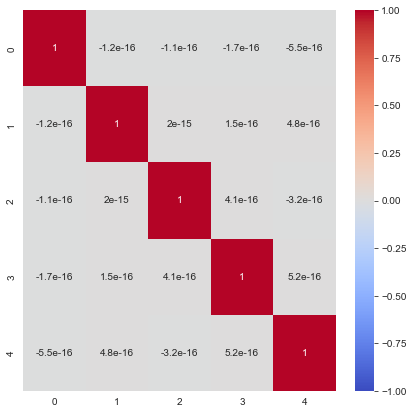

In [21]:
# create dataframe that contained principal components and calculate correlation
plt.figure(figsize=(7, 7))
pca_subjective = pd.DataFrame(pca_feature)
sns.heatmap(pca_subjective.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

**6.A) Pull out the eigenvector for PC1.**

In [22]:
subjective_pca.components_

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

**6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.**

In [23]:
person1 = subjective.iloc[[0]]
person1.T

,0
subjective_attractiveness,-0.785746
subjective_sincerity,-0.202528
subjective_intelligence,-0.353867
subjective_fun,0.193145
subjective_ambition,-0.323290


**6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.**

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [24]:
# calculate 
pc1 = subjective_pca.components_
pc1

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

**6.D) Multiply the original variable values by the eigenvector values.**

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [25]:
# multiply each weights by sd row index 0
mul_maxtrix = [pc1[i] * np.array(person1.iloc[0]) for i in range(len(person1.T))]
mul_maxtrix

[array([ 0.39436137,  0.06385515,  0.16528116, -0.0934557 ,  0.14327801]),
 array([-0.17149685,  0.18411051,  0.0345692 ,  0.05292347, -0.06573853]),
 array([ 0.31588853,  0.0292423 , -0.14964809, -0.09298248, -0.20623056]),
 array([-0.27353305,  0.0432958 , -0.22945455, -0.06973432,  0.17177303]),
 array([ 0.50779866,  0.01771941, -0.14719079,  0.11073086,  0.08734605])]

**6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.**

In [26]:
# sum multiplied values 
[i.sum() for i in mul_maxtrix]

[0.6733199961023879,
 0.03436780272458073,
 -0.10373029334892053,
 -0.3576530856753711,
 0.5764041972769102]

In [27]:
# using model from sklearn
pca_feature[0]

array([ 0.67332   ,  0.0343678 , -0.10373029, -0.35765309,  0.5764042 ])

---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

In [28]:
# instantiate pca and fit in sd_like dataframe
prefer_pca = PCA(n_components=5)
prefer_pca.fit(sd_like)

PCA(n_components=5)

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [29]:
# A: eigenvector
prefer_pca.components_

array([[ 3.20753112e-01,  4.30670129e-01, -5.13289220e-01,
        -5.73131676e-01, -3.45969565e-01],
       [ 6.49921628e-01,  5.32191987e-01,  3.24132297e-01,
         2.65063681e-01,  3.45040672e-01],
       [ 2.08050622e-05, -1.60309917e-01, -4.54907251e-01,
        -2.24216382e-01,  8.46809977e-01],
       [ 6.22451715e-01, -5.87488681e-01, -3.38227940e-01,
         3.33354423e-01, -2.04664607e-01],
       [ 2.95420347e-01, -4.00565486e-01,  5.56896475e-01,
        -6.63221810e-01,  4.77206044e-02]])

#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [30]:
# Transform sd_like columns into principle component space
prefer_pca_array = prefer_pca.transform(sd_like)

#### 7.C) Verify that these columns are uncorrelated.

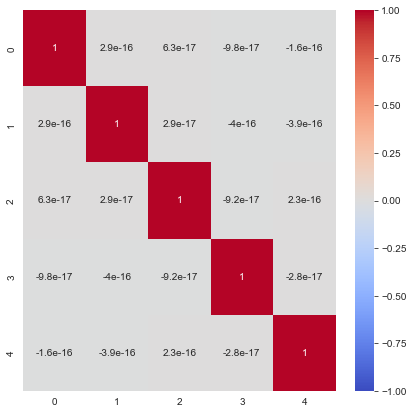

In [31]:
# calculate correlation scores for verify component are uncorrelated
plt.figure(figsize=(7, 7))
prefer_pca_df = pd.DataFrame(prefer_pca_array)
sns.heatmap(prefer_pca_df.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm');

From heatmap above there is no correlated value because all values are almost 0

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [32]:
reading = sd['like_reading'].values

**8.A) Linear regression cross-validated on original variables (`sd_like.values`).**

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

In [33]:
# instantiate linear regression and calculate mean of cross val scores
# sd_like is dataframe that contained five columns start with like and calculated z_score 
cross_val_score(LinearRegression(), sd_like.values, reading).mean()

0.09193231749299233

**8.B) Linear regression on the first principal component.**

- What is the mean cross-validation score?

In [34]:
# instantiate pca with 1st component and calculate mean of cross val scores
pca_1st = PCA(n_components=1)
first_component = pca_1st.fit_transform(sd_like)
cross_val_score(LinearRegression(), first_component, reading).mean()

0.05341726555351913

In [35]:
# extract explained variance ratio from pca_1st
pca_1st.explained_variance_ratio_

array([0.38165737])

Explained variance ratio from pca_1st is quite low because the value is 0.38

**8.C) Linear regression on first three principal components.**

- What is the mean cross-validation score?

In [36]:
# instantiate pca with 1st to 3rd component and calculate mean of cross val scores
pca_3rd = PCA(n_components=3)
first_component = pca_3rd.fit_transform(sd_like)
cross_val_score(LinearRegression(), first_component, reading).mean()

0.092613933107964

In [37]:
# extract explained variance ratio from pca_3rd
pca_3rd.explained_variance_ratio_
pca_3rd.explained_variance_ratio_.sum()

0.8142255168104869

Cumulative explained variance ratio from pca_3 is high enough because the value is 81% which almost 100%.

The R2 score from all models are low because all of the features that use for predict reading are don't have linear relationship and also pca assumption need features that have linear regression but all of assumption is violetad.

---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.